<a href="https://colab.research.google.com/github/Sankalp-2820/Regional-Flood-Frequency-Analysis/blob/main/CE6670_Project_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part - 4. Contains the preparation of Variables X, the Labels Y and training and validation of 4 Machine Learning Models**

# Importing Libraries

In [126]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Mounting Drive and adding path to the folder

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
rows_to_drop = [12,13,14,17,44,51,54,55,57,69,70,78,94,99,157,159,161,170,172]

# Reading the streamflow quantiles csv

In [139]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/recalc_quantiles_sf.csv'
sf_quantiles = pd.read_csv(path)
sf_quantiles = sf_quantiles.drop(columns = ['Unnamed: 0'])
sf_quantiles.rename(columns = {'Station':'station_id'}, inplace = True)
sf_quantiles.head()

,s,loc,scale,KS_statistic,p_value,2-year return period quantile,5-year return period quantile,10-year return period quantile,15-year return period quantile,20-year return period quantile,25-year return period quantile,30-year return period quantile,40-year return period quantile,50-year return period quantile,100-year return period quantile,500-year return period quantile
0,0.894549,-4.315671,38.826286,0.066242,0.989820,34.510615,78.115910,117.865838,144.378537,164.785823,181.577352,195.945699,219.848937,239.466679,306.788825,505.349106
1,0.944802,-124.798957,1169.305926,0.124974,0.519485,1044.506969,2464.987324,3799.635271,4704.197186,5406.764673,5988.467155,6488.586239,7325.001664,8015.243607,10406.454122,17613.070834
2,0.820924,-29.028317,182.333278,0.133928,0.432224,153.304961,334.822132,493.088899,596.197608,674.519148,738.377451,792.642612,882.221305,955.150028,1201.981429,1907.374009
3,0.690649,-208.043504,1050.845905,0.081118,0.935774,842.802400,1671.183459,2338.400909,2755.303234,3064.646636,3312.816973,3521.131967,3860.328982,4132.569242,5031.769347,7462.562268
4,0.707379,-17.425214,109.742713,0.086499,0.900547,92.317499,181.610399,254.270085,299.915247,333.886335,361.196304,384.156569,421.608346,451.722342,551.499492,823.152654


In [140]:
sf_quantiles['station_id'] = stations

In [70]:
import pandas as pd

# Assuming 'result_df' is your DataFrame and 'file_path' is the desired file path
file_path = "output.xlsx"
sf_quantiles.to_excel(file_path, index=True)  # Set index=True if you want to include row index


In [141]:
sf_quantiles = sf_quantiles.drop(rows_to_drop)
sf_quantiles.shape

(176, 17)

# Reading the Precipitation quantiles csv

In [142]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/recalc_quantiles_prec.csv'
prec_quantiles = pd.read_csv(path)
prec_quantiles = prec_quantiles.drop(columns = ['Unnamed: 0'])
prec_quantiles.rename(columns = {'Station':'station_id'}, inplace = True)
prec_quantiles.head()

,s,loc,scale,KS_statistic,p_value,2-year return period quantile,5-year return period quantile,10-year return period quantile,15-year return period quantile,20-year return period quantile,25-year return period quantile,30-year return period quantile,40-year return period quantile,50-year return period quantile,100-year return period quantile,500-year return period quantile
0,0.598051,23.266053,35.944771,0.100030,0.781511,59.210825,82.726781,100.621951,111.475105,119.394952,125.675932,130.902370,139.330086,146.025929,167.762989,224.259264
1,0.344285,-5.037665,66.772975,0.076735,0.958220,61.735310,84.177938,98.767667,106.917638,112.598529,116.963827,120.510268,126.078608,130.381277,143.706076,174.827262
2,0.446548,14.768406,66.571827,0.050665,0.999806,81.340234,111.709691,132.753153,144.905429,153.534126,160.249520,165.758133,174.500635,181.332184,202.893422,255.460361
3,0.470226,14.959869,38.003407,0.084126,0.917088,52.963276,71.413989,84.388206,91.938352,97.322290,101.524774,104.979768,110.476699,114.783267,128.435239,162.052600
4,1.041067,50.068458,38.954177,0.057738,0.998262,89.022635,143.625374,197.972968,235.951345,265.962686,291.109508,312.926403,349.785715,380.525256,488.967617,829.640269


In [143]:
prec_quantiles['station_id'] = stations

In [144]:
prec_quantiles = prec_quantiles.drop(rows_to_drop)
prec_quantiles.shape

(176, 17)

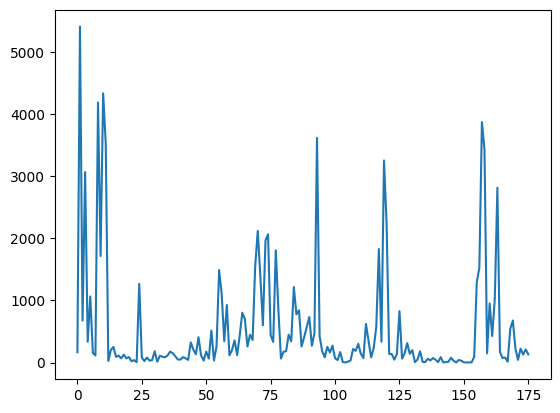

In [146]:
plt.plot(np.arange(176),sf_quantiles['20-year return period quantile'])

In [147]:
prec_quantiles.head(195)

,s,loc,scale,KS_statistic,p_value,2-year return period quantile,5-year return period quantile,10-year return period quantile,15-year return period quantile,20-year return period quantile,25-year return period quantile,30-year return period quantile,40-year return period quantile,50-year return period quantile,100-year return period quantile,500-year return period quantile,station_id
0,0.598051,23.266053,35.944771,0.100030,0.781511,59.210825,82.726781,100.621951,111.475105,119.394952,125.675932,130.902370,139.330086,146.025929,167.762989,224.259264,915011A
1,0.344285,-5.037665,66.772975,0.076735,0.958220,61.735310,84.177938,98.767667,106.917638,112.598529,116.963827,120.510268,126.078608,130.381277,143.706076,174.827262,919003A
2,0.446548,14.768406,66.571827,0.050665,0.999806,81.340234,111.709691,132.753153,144.905429,153.534126,160.249520,165.758133,174.500635,181.332184,202.893422,255.460361,919201A
3,0.470226,14.959869,38.003407,0.084126,0.917088,52.963276,71.413989,84.388206,91.938352,97.322290,101.524774,104.979768,110.476699,114.783267,128.435239,162.052600,919309A
4,1.041067,50.068458,38.954177,0.057738,0.998262,89.022635,143.625374,197.972968,235.951345,265.962686,291.109508,312.926403,349.785715,380.525256,488.967617,829.640269,922101B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.205908,-10.121994,67.986236,0.084329,0.915735,57.864242,70.728531,78.394366,82.487471,85.269967,87.371543,89.056732,91.664574,93.649286,99.640582,112.848286,312061
191,0.218274,-12.856289,77.748490,0.066743,0.988935,64.892201,80.570949,89.987185,95.035281,98.474678,101.076407,103.165093,106.401538,108.867998,116.330552,132.866513,314207
192,0.412072,10.857776,35.451280,0.056700,0.998675,46.309056,61.005252,70.972290,76.664061,80.680396,83.792777,86.337559,90.361693,93.494358,103.318408,126.925074,314213
193,0.047928,-248.325312,318.408017,0.062758,0.994617,70.082705,83.188912,90.253071,93.834336,96.200119,97.952102,99.336149,101.442824,103.018539,107.638991,117.178862,315450


# Calculating the correlation between the quantiles of Streamflow and Precipitation values for all the stations

In [148]:
quantiles = ['2-year return period quantile','5-year return period quantile','10-year return period quantile','15-year return period quantile','20-year return period quantile','25-year return period quantile','30-year return period quantile','40-year return period quantile','50-year return period quantile','100-year return period quantile','500-year return period quantile']

<function matplotlib.pyplot.show(close=None, block=None)>

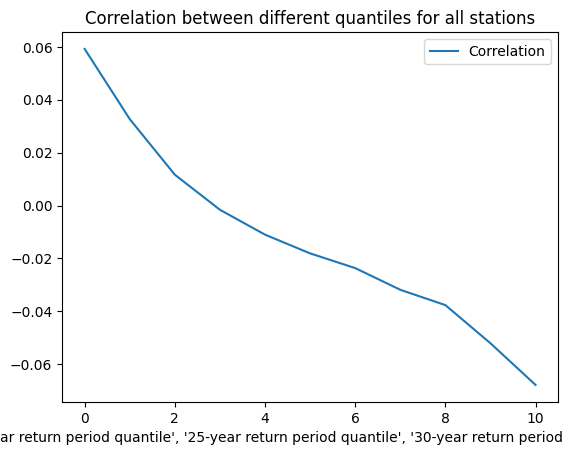

In [151]:
correlations = []
for q in quantiles:
  correlations.append(np.corrcoef(sf_quantiles[q],prec_quantiles[q])[0][1])
plt.plot(np.arange(11),correlations,label = 'Correlation')
plt.legend()
plt.title('Correlation between different quantiles for all stations')
plt.xlabel(quantiles)
plt.show

# Plotting the streamflow and precipitation quantiles together

In [152]:
print(np.mean(sf_quantiles['20-year return period quantile']))
print(np.max(sf_quantiles['20-year return period quantile']))

540.9110193445587
5406.7646725109935


In [153]:
print(np.mean(sf_quantiles['50-year return period quantile']))
print(np.max(sf_quantiles['50-year return period quantile']))

882.7692880484955
10308.927104645863


In [154]:
sf = np.array(sf_quantiles['20-year return period quantile'])/np.max(sf_quantiles['20-year return period quantile'])
rain = np.array(prec_quantiles['20-year return period quantile'])/np.max(prec_quantiles['20-year return period quantile'])
print(sf,rain)

[3.04777132e-02 1.00000000e+00 1.24754671e-01 5.66817093e-01
 6.17534431e-02 1.96566135e-01 2.86578974e-02 2.09806007e-02
 7.73707212e-01 3.16939846e-01 8.00972025e-01 6.51864514e-01
 4.65084673e-03 3.76793117e-02 4.62696447e-02 1.67895631e-02
 2.06546162e-02 1.22567075e-02 2.33156409e-02 1.23686217e-02
 1.63807833e-02 3.74652658e-03 7.08111162e-03 9.89051402e-04
 2.34194840e-01 1.51236656e-02 4.42853573e-03 1.47661900e-02
 5.67381906e-03 6.98804470e-03 3.37977059e-02 2.53559888e-03
 2.03671467e-02 1.70598401e-02 1.55799147e-02 2.10077483e-02
 3.25738528e-02 2.77895749e-02 1.87010149e-02 8.84758562e-03
 8.89776680e-03 1.61461523e-02 1.24012567e-02 7.86410544e-03
 5.98174461e-02 3.83699773e-02 2.45921319e-02 7.52750320e-02
 2.14703452e-02 5.65041647e-03 3.27304532e-02 1.17302011e-02
 9.51362870e-02 6.00809494e-03 4.76633654e-02 2.75211623e-01
 2.04477110e-01 6.33782921e-02 1.71121303e-01 2.14379514e-02
 3.67960878e-02 6.59234090e-02 2.21206105e-02 8.09305995e-02
 1.48385448e-01 1.290259

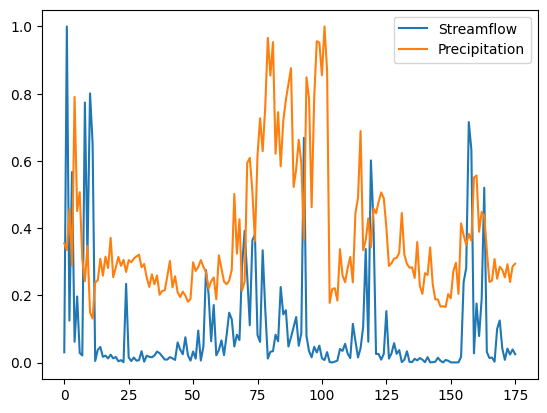

In [155]:
plt.plot(np.arange(176),sf,label = 'Streamflow')
plt.plot(np.arange(176),rain,label = 'Precipitation')
plt.legend()

In [156]:
np.corrcoef(sf,rain)

array([[ 1.        , -0.01100014],
       [-0.01100014,  1.        ]])

# Plotting the inverse quantile function for streamflow and precipitation together for a particular station

In [305]:
station = 0
stations = {
    'Streamflow': {'shape': sf_quantiles.iloc[station,1]	, 'loc': sf_quantiles.iloc[station,2], 'scale': sf_quantiles.iloc[station,3]},
    'Rainfall': {'shape': prec_quantiles.iloc[station,1]	, 'loc': prec_quantiles.iloc[station,2], 'scale': prec_quantiles.iloc[station,3]}
}

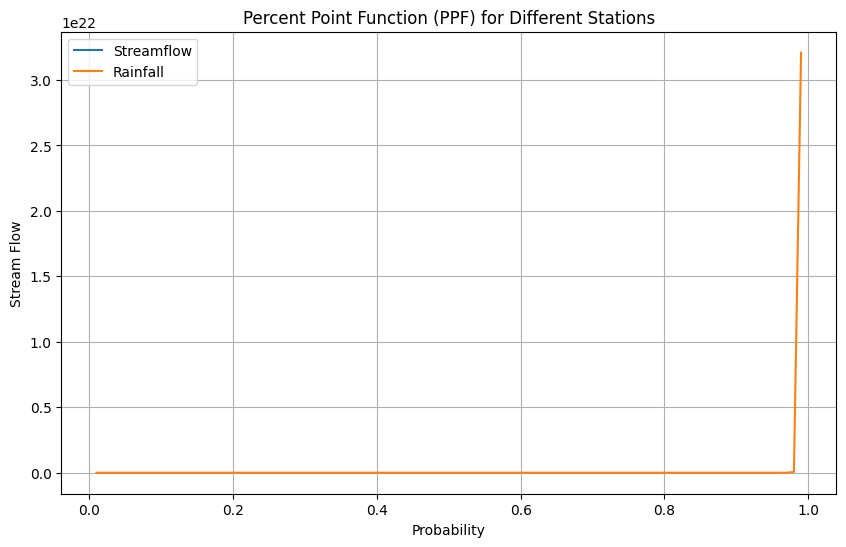

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme,lognorm
probabilities = np.linspace(0.01, 0.99, 100)  # Avoid exactly 0 or 1 to prevent infinities or undefined values
plt.figure(figsize=(10, 6))

for name, params in stations.items():
    # Calculate the PPF for each station
    ppf_values = lognorm.ppf(probabilities, params['shape'], loc=params['loc'], scale=params['scale'])

    # Plotting the PPF curve
    plt.plot(probabilities, ppf_values, label=name)

plt.title('Percent Point Function (PPF) for Different Stations')
plt.xlabel('Probability')
plt.ylabel('Stream Flow')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# prec_quantiles.shape

(136, 11)

# Reading the Soil Attributes csv

In [157]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/soil_attributes.csv'
soil_att = pd.read_csv(path)
soil_att = soil_att.drop(columns = ['Unnamed: 0'])
soil_att.head()

,station_id,geol_prim_prop,geol_sec_prop,unconsoldted,igneous,silicsed,carbnatesed,othersed,metamorph,sedvolc,oldrock,claya,clayb,sanda,solum_thickness,ksat,solpawhc
0,915011A,0.893706,0.105490,0.105490,0.893706,0.000804,0.0,0.000000,0.000000,0.000000,0.000000,62.000000,62.000000,22.00000,1.094932,251.409790,143.969116
1,919003A,0.677353,0.162288,0.130245,0.162288,0.677353,0.0,0.010952,0.014850,0.004309,0.000000,21.000000,21.000000,52.00000,0.558830,60.711822,93.082611
2,919201A,0.496852,0.358334,0.012790,0.358334,0.496852,0.0,0.000000,0.132025,0.000000,0.000000,21.000000,21.000000,52.00000,0.577757,85.172989,108.631004
3,919309A,0.532112,0.172999,0.154676,0.532112,0.172999,0.0,0.085286,0.054931,0.000000,0.058285,20.095238,41.047619,66.76191,0.716285,107.988701,104.810654
4,922101B,0.905953,0.076808,0.000000,0.905953,0.000000,0.0,0.017238,0.076808,0.000000,0.076808,18.000000,54.000000,68.00000,1.015788,96.575882,125.600266


In [158]:
soil_att = soil_att.drop(rows_to_drop)

In [160]:
soil_att.shape

(176, 17)

# Reading the landcover attributes and vegetation csv

In [161]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/land_cover_attributes.csv'
lc_att = pd.read_csv(path)
lc_att = lc_att.drop(columns = ['Unnamed: 0'])
lc_att.head()

,station_id,lc01_extracti,lc03_waterbo,lc04_saltlak,lc05_irrcrop,lc06_irrpast,lc07_irrsuga,lc08_rfcropp,lc09_rfpastu,lc10_rfsugar,...,nvis_forests_n,nvis_forests_e,nvis_shrubs_n,nvis_shrubs_e,nvis_woodlands_n,nvis_woodlands_e,nvis_bare_n,nvis_bare_e,nvis_nodata_n,nvis_nodata_e
0,915011A,0.0000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.0,0.0,100.000000,100.000000,0.0,0.0,0.0,0.000000
1,919003A,0.0002,0.00301,0.0,0.00314,0.00056,0.0006,0.00000,0.00501,0.0005,...,7.713339,7.590923,0.0,0.0,91.809517,91.023895,0.0,0.0,0.0,0.000954
2,919201A,0.0000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,21.583656,21.583656,0.0,0.0,78.326363,78.319428,0.0,0.0,0.0,0.000000
3,919309A,0.0005,0.00005,0.0,0.00932,0.00061,0.0009,0.00033,0.00251,0.0000,...,2.393718,2.393718,0.0,0.0,97.483543,97.480568,0.0,0.0,0.0,0.000000
4,922101B,0.0000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,54.136253,54.136253,0.0,0.0,45.863754,44.183971,0.0,0.0,0.0,0.000000


In [162]:
lc_att = lc_att.drop(rows_to_drop)

In [17]:
stations = lc_att['station_id']

# Reading the topography and geometry csv

In [163]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/top_geo_attributes.csv'
topg_att = pd.read_csv(path)
topg_att = topg_att.drop(columns = ['Unnamed: 0'])
topg_att.head()

,station_id,elev_min,elev_max,elev_mean,elev_range,mean_slope_pct,upsdist,strdensity,strahler,elongratio,...,mrvbf_prop_1,mrvbf_prop_2,mrvbf_prop_3,mrvbf_prop_4,mrvbf_prop_5,mrvbf_prop_6,mrvbf_prop_7,mrvbf_prop_8,mrvbf_prop_9,confinement
0,915011A,739,984.951111,839.435852,245.951111,2.64,40.956673,0.594576,4,0.648115,...,0.0182,0.1305,0.2167,0.1030,0.1314,0.0671,0.0000,0.0,0.0,0.3
1,919003A,183,1355.225342,460.982819,1172.225342,13.45,230.620071,1.006411,7,0.431006,...,0.0737,0.1225,0.1412,0.0279,0.0238,0.0089,0.0000,0.0,0.0,1.0
2,919201A,403,1346.674805,711.929627,943.674805,18.04,53.494884,1.020470,5,0.487923,...,0.1017,0.1199,0.0579,0.0000,0.0000,0.0000,0.0000,0.0,0.0,1.0
3,919309A,124,1290.396118,442.698334,1166.396118,9.97,317.360138,0.957482,6,0.331029,...,0.0560,0.1233,0.1843,0.0388,0.0304,0.0201,0.0259,0.0,0.0,0.0
4,922101B,185,796.703796,447.701813,611.703796,12.51,33.317734,1.056104,4,0.442585,...,0.1020,0.1492,0.1151,0.0042,0.0002,0.0000,0.0000,0.0,0.0,1.0


In [164]:
topg_att = topg_att.drop(rows_to_drop)

# Reading the Anthropogenic attributes csv

In [165]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/anthro_attributes.csv'
anthro_att = pd.read_csv(path)
anthro_att = anthro_att.drop(columns = ['Unnamed: 0'])
anthro_att.head()

,station_id,distupdamw,impound_fac,flow_div_fac,leveebank_fac,infrastruc_fac,settlement_fac,extract_ind_fac,landuse_fac,catchment_di,flow_regime_di,river_di
0,915011A,40.956673,0.0,0.0,0,0.000000,0.000000,0.0,0.3500,0.213224,0.000682,0.106953
1,919003A,217.713760,0.0,0.0,0,0.000000,0.040000,0.0,0.0500,0.054700,0.146411,0.100555
2,919201A,53.494884,0.0,0.0,0,0.300000,0.100000,0.0,0.2000,0.032784,0.000000,0.016392
3,919309A,294.372955,0.0,0.0,0,0.077778,0.011268,0.0,0.0500,0.064917,0.200487,0.132702
4,922101B,33.317734,0.0,0.0,0,0.250000,0.250000,0.0,0.2875,0.121370,0.000000,0.060685


In [166]:
anthro_att = anthro_att.drop(rows_to_drop)

# Reading the Catchment area csv

In [167]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/catchment_area.csv'
area_att = pd.read_csv(path)
area_att = area_att.drop(columns = ['Unnamed: 0'])
area_att['station_id']=anthro_att['station_id']
area_att.head()

,catchment_area,station_id
0,565.3,915011A
1,7731.7,919003A
2,531.7,919201A
3,8656.4,919309A
4,171.2,922101B


In [168]:
area_att = area_att.drop(rows_to_drop)

In [169]:
print(sf_quantiles.shape)
print(prec_quantiles.shape)
print(soil_att.shape)
print(lc_att.shape)
print(topg_att.shape)
print(anthro_att.shape)
print(area_att.shape)

(176, 17)
(176, 17)
(176, 17)
(176, 36)
(176, 23)
(176, 12)
(176, 2)


In [81]:
prec_quantiles.shape[1]+soil_att.shape[1]+lc_att.shape[1]+topg_att.shape[1]+anthro_att.shape[1]

105

# Creating X and Y variables for training and testing models

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
Y = sf_quantiles['20-year return period quantile']

In [172]:
Y.shape

(176,)

In [173]:
merged_df = pd.merge(prec_quantiles, soil_att, on='station_id')
merged_df = pd.merge(merged_df, lc_att, on='station_id')
merged_df = pd.merge(merged_df, topg_att, on='station_id')
merged_df = pd.merge(merged_df, anthro_att, on='station_id')
merged_df = pd.merge(merged_df, area_att, on='station_id')

# Print the merged DataFrame
merged_df.head()


,s,loc,scale,KS_statistic,p_value,2-year return period quantile,5-year return period quantile,10-year return period quantile,15-year return period quantile,20-year return period quantile,...,flow_div_fac,leveebank_fac,infrastruc_fac,settlement_fac,extract_ind_fac,landuse_fac,catchment_di,flow_regime_di,river_di,catchment_area
0,0.598051,23.266053,35.944771,0.100030,0.781511,59.210825,82.726781,100.621951,111.475105,119.394952,...,0.0,0,0.000000,0.000000,0.0,0.3500,0.213224,0.000682,0.106953,565.3
1,0.344285,-5.037665,66.772975,0.076735,0.958220,61.735310,84.177938,98.767667,106.917638,112.598529,...,0.0,0,0.000000,0.040000,0.0,0.0500,0.054700,0.146411,0.100555,7731.7
2,0.446548,14.768406,66.571827,0.050665,0.999806,81.340234,111.709691,132.753153,144.905429,153.534126,...,0.0,0,0.300000,0.100000,0.0,0.2000,0.032784,0.000000,0.016392,531.7
3,0.470226,14.959869,38.003407,0.084126,0.917088,52.963276,71.413989,84.388206,91.938352,97.322290,...,0.0,0,0.077778,0.011268,0.0,0.0500,0.064917,0.200487,0.132702,8656.4
4,1.041067,50.068458,38.954177,0.057738,0.998262,89.022635,143.625374,197.972968,235.951345,265.962686,...,0.0,0,0.250000,0.250000,0.0,0.2875,0.121370,0.000000,0.060685,171.2


In [174]:
merged_df.shape

(176, 102)

In [175]:
merged_df.drop(columns = ['station_id','s','loc','scale','KS_statistic','p_value','2-year return period quantile','5-year return period quantile','10-year return period quantile','15-year return period quantile','25-year return period quantile','30-year return period quantile','40-year return period quantile','50-year return period quantile','100-year return period quantile','500-year return period quantile'],inplace = True)
merged_df.head()

,20-year return period quantile,geol_prim_prop,geol_sec_prop,unconsoldted,igneous,silicsed,carbnatesed,othersed,metamorph,sedvolc,...,flow_div_fac,leveebank_fac,infrastruc_fac,settlement_fac,extract_ind_fac,landuse_fac,catchment_di,flow_regime_di,river_di,catchment_area
0,119.394952,0.893706,0.105490,0.105490,0.893706,0.000804,0.0,0.000000,0.000000,0.000000,...,0.0,0,0.000000,0.000000,0.0,0.3500,0.213224,0.000682,0.106953,565.3
1,112.598529,0.677353,0.162288,0.130245,0.162288,0.677353,0.0,0.010952,0.014850,0.004309,...,0.0,0,0.000000,0.040000,0.0,0.0500,0.054700,0.146411,0.100555,7731.7
2,153.534126,0.496852,0.358334,0.012790,0.358334,0.496852,0.0,0.000000,0.132025,0.000000,...,0.0,0,0.300000,0.100000,0.0,0.2000,0.032784,0.000000,0.016392,531.7
3,97.322290,0.532112,0.172999,0.154676,0.532112,0.172999,0.0,0.085286,0.054931,0.000000,...,0.0,0,0.077778,0.011268,0.0,0.0500,0.064917,0.200487,0.132702,8656.4
4,265.962686,0.905953,0.076808,0.000000,0.905953,0.000000,0.0,0.017238,0.076808,0.000000,...,0.0,0,0.250000,0.250000,0.0,0.2875,0.121370,0.000000,0.060685,171.2


In [176]:
X = merged_df
X.shape

(176, 86)

In [177]:
np.corrcoef(X['20-year return period quantile'],Y)

array([[ 1.        , -0.01100014],
       [-0.01100014,  1.        ]])

In [178]:
print(X.shape)
print(Y.shape)

(176, 86)
(176,)


array([[1.        , 0.46557323],
       [0.46557323, 1.        ]])

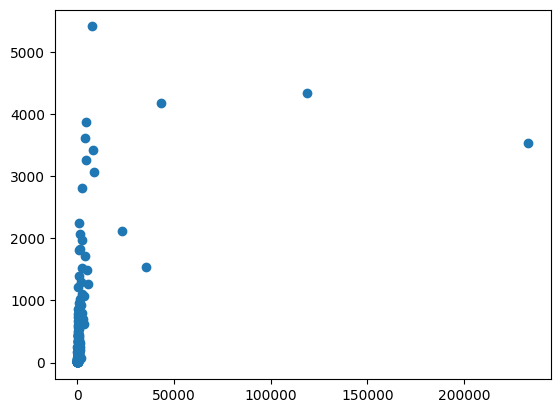

In [211]:
plt.scatter(X['catchment_area'],Y)
np.corrcoef(X['catchment_area'],Y)

# Trying to understand the highly correlated features

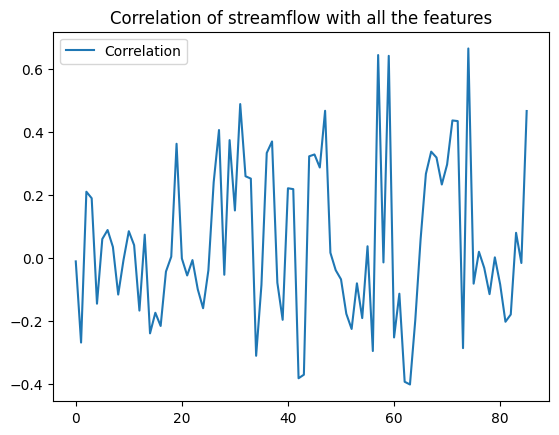

[27, 31, 47, 57, 59, 71, 72, 74, 85]


In [181]:
feature_correlations = []
required_features = []
for i in range(86):
  corr = np.corrcoef(X.iloc[:,i],Y)[0][1]
  feature_correlations.append(np.corrcoef(X.iloc[:,i],Y)[0][1])
  if corr>0.4:
    required_features.append(i)
plt.plot(np.arange(86),feature_correlations,label='Correlation')
plt.title('Correlation of streamflow with all the features')
plt.legend()
plt.show()
print(required_features)

In [182]:
correlated_features = [27, 31, 47, 57, 59, 71, 72, 74, 85]

In [213]:
tempX = X.iloc[:, correlated_features]


# Splitting data to train and test sets

In [267]:
X_train,X_test,Y_train,Y_test = train_test_split(tempX,Y,test_size = 0.2,random_state = 42)

# Standardising the data

In [268]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [269]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [270]:
print(X_train.shape)

(140, 9)


# Using PCA to reduce the dimensions from 86

In [281]:
from sklearn.decomposition import PCA
ncomps = 4
pca = PCA(n_components = ncomps)

In [282]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

Explained variance percentage:
[59.30933606 19.40132989  6.46796114  5.93395465]


Text(0.5, 1.0, 'Explained Variance by the PCs')

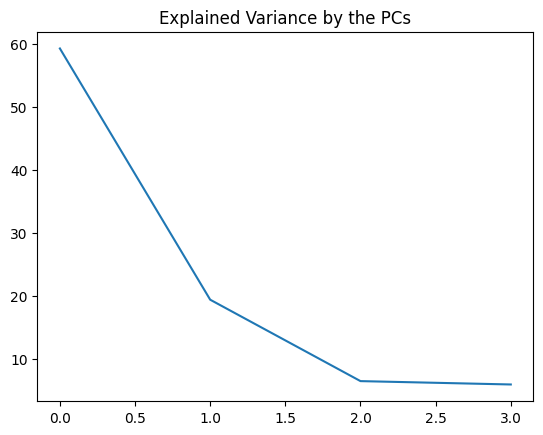

In [283]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_percentage = explained_variance_ratio * 100
print("Explained variance percentage:")
print(explained_variance_percentage)
plt.plot(np.arange(ncomps),explained_variance_percentage)
plt.title('Explained Variance by the PCs')

In [284]:
print(X_train_trf.shape)
print(X_test_trf.shape)

(140, 4)
(36, 4)


# Creating a Linear Regression model

In [285]:
from sklearn.linear_model import LinearRegression

In [286]:
regression = LinearRegression()
regression.fit(X_train_trf,Y_train)

LinearRegression()

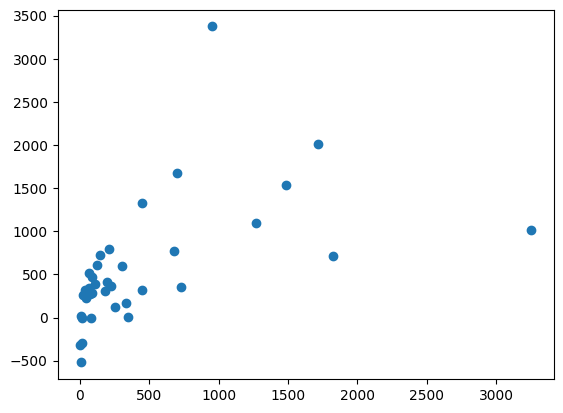

In [287]:
Y_pred = regression.predict(X_test_trf)
plt.scatter(Y_test,Y_pred)


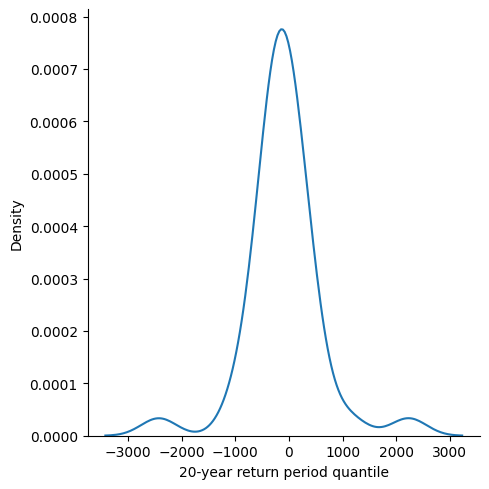

In [288]:
import seaborn as sns
residuals = Y_test - Y_pred
## plot these residuals
sns.displot(residuals,kind = 'kde')

In [289]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))

432.42401918572773
460888.80775605026
678.8879198778325


In [290]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
print(score)

-0.007012344423056316


In [291]:
# X_train_trf = np.array(X_train_trf)
# Y_train = np.array(Y_train)

# Creating an ANN

In [292]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Type of layer
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU # Activation functions
from tensorflow.keras.layers import Dropout

In [293]:
from tensorflow.keras import models, layers

model_ann = models.Sequential([
    layers.Dense(8,activation='relu'),
    layers.Dense(15,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6,activation='relu'),
    layers.Dense(1)
])

In [294]:
import tensorflow as tf
model_ann.compile(optimizer = tf.keras.optimizers.Adam(),loss = tf.keras.losses.MeanAbsoluteError(),metrics = [tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredError()]) ## By default the learning rate is initialised as 0.01.


In [295]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
Model_ann = model_ann.fit(X_train_trf,Y_train, epochs = 500, batch_size = 20, callbacks = [early_stopping], validation_split = .2)

2/2 [==============================] - 0s 5ms/step
Mean Squared Error (MSE): 376685.21940088586
Mean Absolute Error (MAE): 311.0942635821702
R-squared: 0.17696706989860755


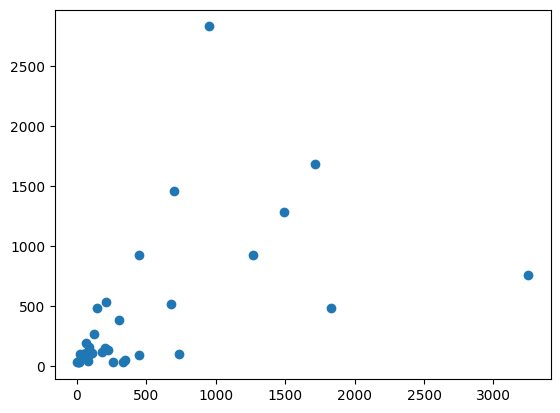

In [297]:
predictions = model_ann.predict(X_test_trf)
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)
plt.scatter(Y_test,predictions)


# Creating a XGB Regressor

In [303]:
# !pip install xgboost

In [299]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [300]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train_trf, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [301]:
y_pred_xgb = model_xgb.predict(X_test_trf)


In [302]:
mse = mean_squared_error(Y_test, y_pred_xgb)
mse = mean_squared_error(Y_test, y_pred_xgb)
mae = mean_absolute_error(Y_test, y_pred_xgb)
r2 = r2_score(Y_test, y_pred_xgb)
print("Mean Squared Error:", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error: 413848.03003547445
Mean Absolute Error (MAE): 378.6506687398587
R-squared: 0.0957687235020176


# Creating a Support vector Regressor

In [304]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model_svr = SVR()
model_svr.fit(X_train_trf, Y_train)

y_pred_svr = model_svr.predict(X_test_trf)

mse = mean_squared_error(Y_test, y_pred_svr)
mse = mean_squared_error(Y_test, y_pred_svr)
mae = mean_absolute_error(Y_test, y_pred_svr)
r2 = r2_score(Y_test, y_pred_svr)
print("Mean Squared Error:", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error: 533661.1959718668
Mean Absolute Error (MAE): 390.45339077467685
R-squared: -0.16601532308784317
